In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# loadind the data
train = pd.read_csv('C:/Users/Srinivas/Downloads/Desktop/train1.csv')


In [3]:
test = pd.read_csv('C:/Users/Srinivas/Downloads/Desktop/test1.csv')

In [4]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [7]:
# columns in the dataset
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
# columns in the dataset
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

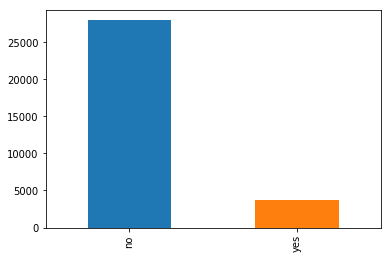

In [9]:
train['subscribed'].value_counts().plot.bar()

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lgr=LogisticRegression()

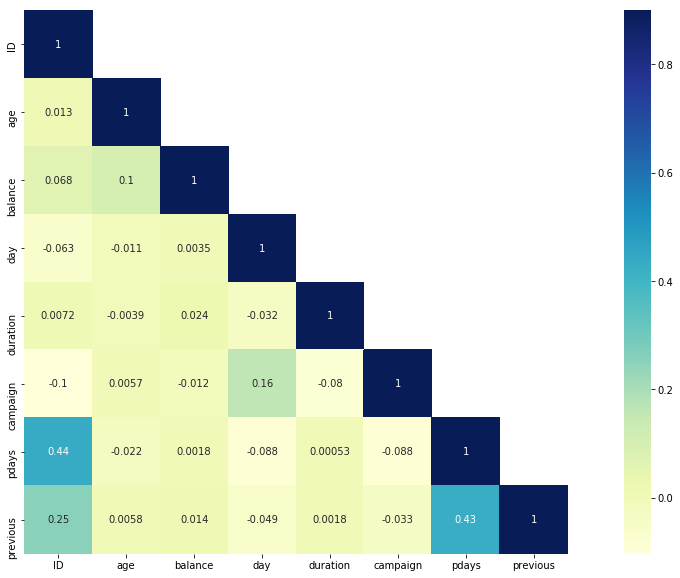

In [12]:
# the correlation between numerical variables
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [13]:
# missing values in the datasaet
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [14]:
# missing values in the datasaet
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y=train['subscribed']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2,random_state=0)

In [18]:
x_train=train.drop('subscribed',axis=1)

In [19]:
x_test=train.drop('subscribed',axis=1)

In [20]:
y_train=train['subscribed']

In [21]:
y_test=train['subscribed']

In [22]:
# checking the shape of X_train, y_train, X_val and y_val
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31647, 17), (31647,), (31647, 17), (31647,))

In [23]:
lgr=LogisticRegression()

In [24]:
x_train=pd.get_dummies(x_train)

In [25]:
x_test=pd.get_dummies(x_test)

In [26]:
x_train.fillna(0,inplace=True)

In [27]:
x_test.fillna(0,inplace=True)

In [28]:
train=pd.get_dummies(train)

In [29]:
lgr.fit(x_train,y_train)

C:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
lgr.score(x_train,y_train)

0.9024868075962966

In [31]:
pred=lgr.predict(x_test)

In [32]:
pred

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [33]:
lgr.score(x_test,y_test)

0.9024868075962966

In [34]:
sub=pd.DataFrame()

In [35]:
sub['count']=pred

In [36]:
sub.to_csv('sub.csv', header=True, index=False)